In [1]:
# Notebook for loading EM structure generated by script into a virtuoso window,
# and testing to make sure that the same EMX results are obtainable again
# essentially, validate the data generated... 
from EMXSimulator3 import EMXSimulator
import numpy as np
import skrf as rf
from torch.utils.data import Dataset
import torch

RANDOM_SEED = 10
RESULTS_PATH = "./Test_Results300/"

####################
# Dataset object for DataLoader
class EM300Dataset(Dataset):
    def __init__(self, x_data_path, y_data_path):
        super().__init__()
        self.x = torch.tensor(np.load(x_data_path))
        self.y = torch.tensor(np.load(y_data_path))

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx].unsqueeze(0), self.y[idx]

# Load datasets
DATA_DIR = "/scratch/gpfs/sbfisher/EM300/data/"
# Create datasets for training the inverse model. 
# Use the training dataset from forward network
x_data_path = DATA_DIR + "x_data.npy"
y_data_path = DATA_DIR + "y_data.npy"

dataset = EM300Dataset(x_data_path, y_data_path)

generator = torch.Generator().manual_seed(RANDOM_SEED)
train, val, test = torch.utils.data.random_split(dataset, [0.8, 0.1, 0.1], generator=generator)
#####################

simulator = EMXSimulator("server-3", struct_height=300, struct_width=300)


In [27]:
# STRUCT_NUM = 298
# # print(len(val))
# test_instance = test[STRUCT_NUM]
# struct, spect = test_instance

test_file = "/scratch/gpfs/sbfisher/EM300/tests/test_struct.npy"
struct = np.load(test_file)
# simulator.create_random_structure()
# simulator.create_pins()
simulator.create_known_structure(np.array(struct.squeeze()))

# Order of ports:
# LEFT RIGHT BOTTOM TOP LEFT_m RIGHT_m BOTTOM_m TOP_m

In [26]:
simulator.delete_structure()
simulator.delete_pins()

In [11]:
print(spect)

tensor([-0.8303, -0.6902, -0.5932,  0.1147,  0.3572, -0.8199, -0.9493, -0.7830,
        -0.3510,  0.4981,  0.6575,  0.7321,  0.8368, -0.6442, -0.4179,  0.1390,
         0.5560,  0.8676,  0.0406,  0.0758,  0.1004,  0.2793,  0.3196,  0.0100,
        -0.0276,  0.0064,  0.1041,  0.0844,  0.1139,  0.1276,  0.1317, -0.2695,
        -0.2156, -0.0888, -0.0027,  0.0524, -0.9577, -0.9364, -0.9240, -0.8543,
        -0.8181, -0.8597, -0.8212, -0.7534, -0.6558,  0.2264,  0.2814,  0.3053,
         0.3738,  0.3404,  0.4296,  0.5360,  0.6321,  0.7202],
       dtype=torch.float64)


In [28]:
# Move s param file into current directory (Only for use after running EMX on this structure)
import shutil
EMX_WORK_PATH = "/home/sbfisher/Cadence/9HPsetup/EMX_work/Thesis_test3.work/"

# move file to this directory
# print(os.getcwd())
DEST_DIR = "/scratch/gpfs/sbfisher/EM300/tests/"
test_file_loc = "/home/sbfisher/Cadence/Thesis/PythonCode/Test_Results300/trial_90000_data.s8p"
shutil.move(EMX_WORK_PATH + "test3.s8p", test_file_loc)
simulator.create_struct_file("/home/sbfisher/Cadence/Thesis/PythonCode/Test_Results300/trial_90000_struct.txt")


In [41]:
em_struct = rf.Network("test.s8p")
em_struct_compare = rf.Network("Test_Results300/{}".format(test_data))

s_params = em_struct.s
s_compare = em_struct_compare.s # truncate first 27 entries, since this starts at 3 GHz instead of 30

# match both parameter lengths to 30-100GHz in 1GHz intervals
if len(s_compare) > 71:
    s_compare = s_compare[-71:]

# calculate total absolute difference between s param files
# for this count real and imaginary parts separately
count = 0
total = 0
freq = 30 # frequency to compare s parameters at
index = freq - 30
for i in range(len(s_params[index])):
    for j in range(len(s_params[index, i])):
        total += abs(np.real(s_params[index, i,j]) - np.real(s_compare[index, i,j]))
        total += abs(np.imag(s_params[index, i,j]) - np.imag(s_compare[index, i,j]))
        count+=2

# Total difference looks negligible
print(total, count)
print(total/count)


8.093399999964303e-05 128
6.322968749972112e-07


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


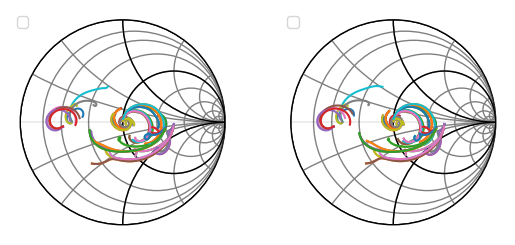

In [23]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
em_struct.plot_s_smith(label="")
# x.legend.remove()
plt.subplot(1,2,2)
em_struct_compare.plot_s_smith(label="")


In [8]:
import os
print(len(os.listdir("./Test_Results200"))/2)

50185.0
